<a href="https://colab.research.google.com/github/RenatoSMacedo/Challenge_Telecom_X_Br_Parte2/blob/main/Challenge_Telecom_X_Br_Parte02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Carregando a base
df = pd.read_csv('/content/TelecomX_Data.csv')

# Visualizando as primeiras linhas
df.head()

,ID_Cliente,Evasao,Genero,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Forma_Pagamento,Gastos_Mensais,Gastos_Totais,Contas_Diarias,Qtd_Servicos,Tem_Internet
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,One year,1,Mailed check,65.6,593.30,2.186667,3,True
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667,1,True
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333,1,True
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667,4,True
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667,2,True


In [20]:
# Remover colunas irrelevantes para a análise
df.drop(columns=['ID_Cliente'], inplace=True)
df.drop(columns=['Tem_Internet'], inplace=True)
df.drop(columns=['Qtd_Servicos'], inplace=True)

In [21]:
# Verifica tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Evasao                7032 non-null   int64  
 1   Genero                7032 non-null   object 
 2   Idoso                 7032 non-null   int64  
 3   Possui_Parceiro       7032 non-null   int64  
 4   Possui_Dependentes    7032 non-null   int64  
 5   Meses_Contrato        7032 non-null   int64  
 6   Servico_Telefone      7032 non-null   int64  
 7   Multiplas_Linhas      7032 non-null   int64  
 8   Tipo_Internet         7032 non-null   object 
 9   Seguranca_Online      7032 non-null   int64  
 10  Backup_Online         7032 non-null   int64  
 11  Protecao_Dispositivo  7032 non-null   int64  
 12  Suporte_Tecnico       7032 non-null   int64  
 13  Streaming_TV          7032 non-null   int64  
 14  Streaming_Filmes      7032 non-null   int64  
 15  Tipo_Contrato        

In [22]:
# One-hot encoding nas colunas categóricas
colunas_categoricas = ['Genero', 'Tipo_Internet', 'Tipo_Contrato', 'Forma_Pagamento']
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

In [23]:
df_encoded.head()

,Evasao,Idoso,Possui_Parceiro,Possui_Dependentes,Meses_Contrato,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,...,Gastos_Totais,Contas_Diarias,Genero_Male,Tipo_Internet_Fiber optic,Tipo_Internet_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Forma_Pagamento_Credit card (automatic),Forma_Pagamento_Electronic check,Forma_Pagamento_Mailed check
0,0,0,1,1,9,1,0,0,1,0,...,593.30,2.186667,False,False,False,True,False,False,False,True
1,0,0,0,0,9,1,1,0,0,0,...,542.40,1.996667,True,False,False,False,False,False,False,True
2,1,0,0,0,4,1,0,0,0,1,...,280.85,2.463333,True,True,False,False,False,False,True,False
3,1,1,1,0,13,1,0,0,1,1,...,1237.85,3.266667,True,True,False,False,False,False,True,False
4,1,1,1,0,3,1,0,0,0,0,...,267.40,2.796667,False,True,False,False,False,False,False,True


In [24]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Evasao                                   7032 non-null   int64  
 1   Idoso                                    7032 non-null   int64  
 2   Possui_Parceiro                          7032 non-null   int64  
 3   Possui_Dependentes                       7032 non-null   int64  
 4   Meses_Contrato                           7032 non-null   int64  
 5   Servico_Telefone                         7032 non-null   int64  
 6   Multiplas_Linhas                         7032 non-null   int64  
 7   Seguranca_Online                         7032 non-null   int64  
 8   Backup_Online                            7032 non-null   int64  
 9   Protecao_Dispositivo                     7032 non-null   int64  
 10  Suporte_Tecnico                          7032 no

In [25]:
#Verificar desbalanceamento
df_encoded['Evasao'].value_counts(normalize=True).round(3)

,proportion
Evasao,
0,0.734
1,0.266


In [26]:
# Separar as variáveis explicativas (X) e o alvo (y)
X = df_encoded.drop('Evasao', axis=1)
y = df_encoded['Evasao']

# Aplicar o SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verificar a nova distribuição da variável alvo
print("Distribuição após SMOTE:")
print(y_resampled.value_counts())


Distribuição após SMOTE:
Evasao
0    5163
1    5163
Name: count, dtype: int64


In [27]:
# Verificando a correlação das variáveis com a Evasão
corr = df_encoded.corr()
corr['Evasao']

,Evasao
Evasao,1.000000
Idoso,0.150541
Possui_Parceiro,-0.149982
Possui_Dependentes,-0.163128
Meses_Contrato,-0.354049
Servico_Telefone,0.011691
Multiplas_Linhas,0.040033
Seguranca_Online,-0.171270
Backup_Online,-0.082307
Protecao_Dispositivo,-0.066193


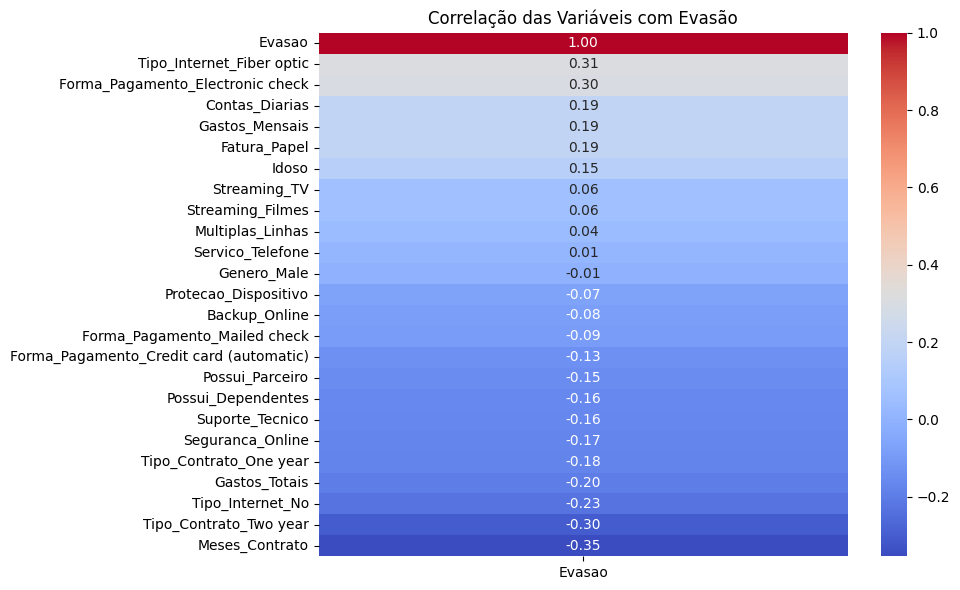

In [28]:
# Visualização gráfica da Correlação
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr()[['Evasao']].sort_values(by='Evasao', ascending=False),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação das Variáveis com Evasão')
plt.tight_layout()
plt.show()

In [29]:
# Copiar os dados para não alterar o original
X_resampled_scaled = X_resampled.copy()

# Define as colunas contínuas que devem ser padronizadas
colunas_continuas = ['Gastos_Mensais', 'Gastos_Totais', 'Contas_Diarias']

# Aplica o StandardScaler
scaler = StandardScaler()
X_resampled_scaled[colunas_continuas] = scaler.fit_transform(X_resampled_scaled[colunas_continuas])

/tmp/ipython-input-1645150111.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_encoded, palette='pastel')


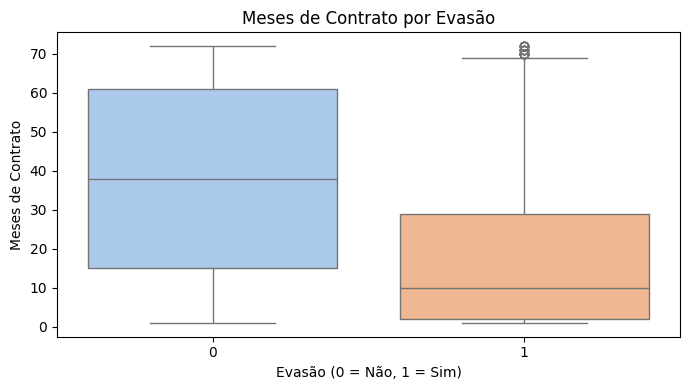

In [30]:
# Boxplot — Meses_Contrato × Evasao
plt.figure(figsize=(7, 4))
sns.boxplot(x='Evasao', y='Meses_Contrato', data=df_encoded, palette='pastel')
plt.title('Meses de Contrato por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Meses de Contrato')
plt.tight_layout()
plt.show()

/tmp/ipython-input-1992262454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Evasao', y='Gastos_Totais', data=df_encoded, palette='pastel')


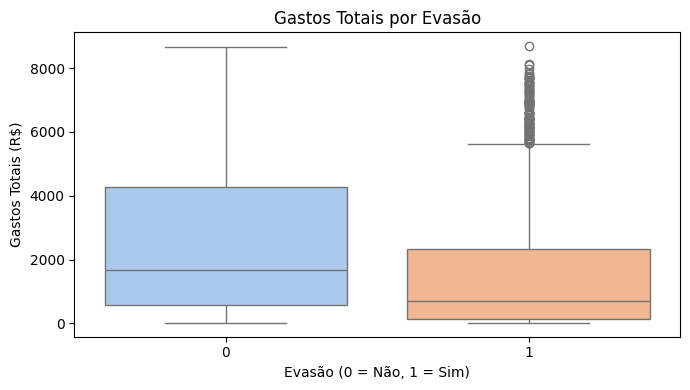

In [31]:
# Boxplot — Gastos_Totais × Evasao
plt.figure(figsize=(7, 4))
sns.boxplot(x='Evasao', y='Gastos_Totais', data=df_encoded, palette='pastel')
plt.title('Gastos Totais por Evasão')
plt.xlabel('Evasão (0 = Não, 1 = Sim)')
plt.ylabel('Gastos Totais (R$)')
plt.tight_layout()
plt.show()

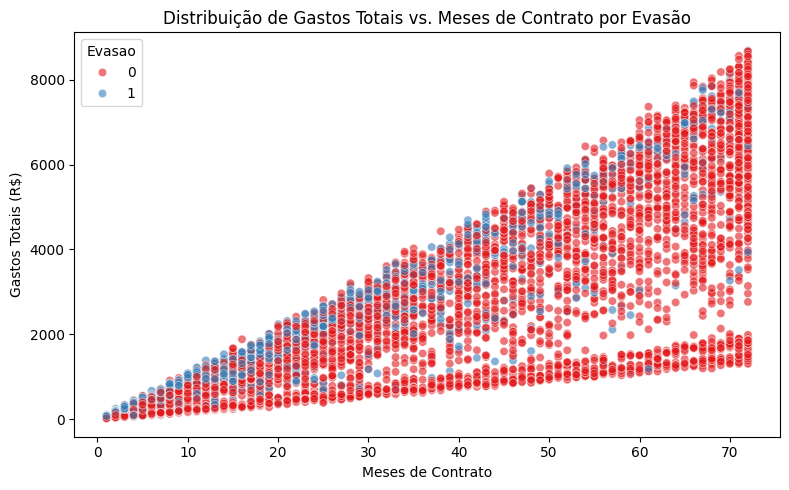

In [32]:
# Scatter Plot — Gastos_Totais × Meses_Contrato com Evasão
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Meses_Contrato', y='Gastos_Totais', hue='Evasao', data=df_encoded, palette='Set1', alpha=0.6)
plt.title('Distribuição de Gastos Totais vs. Meses de Contrato por Evasão')
plt.xlabel('Meses de Contrato')
plt.ylabel('Gastos Totais (R$)')
plt.tight_layout()
plt.show()

In [33]:
# Dividir em treino (70%) e teste (30%) usando dados balanceados pelo SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=42,
    stratify=y_resampled  # mantém a proporção entre as classes após SMOTE
)

print("Tamanho treino:", X_train.shape, y_train.shape)
print("Tamanho teste:", X_test.shape, y_test.shape)


Tamanho treino: (7228, 24) (7228,)
Tamanho teste: (3098, 24) (3098,)


In [34]:
# ===== Modelo 1: Regressão Logística (com normalização) =====
pipeline_log = Pipeline([
    ('scaler', StandardScaler()),  # normaliza as variáveis
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline_log.fit(X_train, y_train)

# ===== Modelo 2: Random Forest (sem normalização) =====
rf_model = RandomForestClassifier(
    n_estimators=100,   # número de árvores
    random_state=42
)

rf_model.fit(X_train, y_train)

print("Modelos treinados com sucesso!")


Modelos treinados com sucesso!


===== Regressão Logística =====
              precision    recall  f1-score   support

           0      0.823     0.818     0.820      1549
           1      0.819     0.824     0.821      1549

    accuracy                          0.821      3098
   macro avg      0.821     0.821     0.821      3098
weighted avg      0.821     0.821     0.821      3098



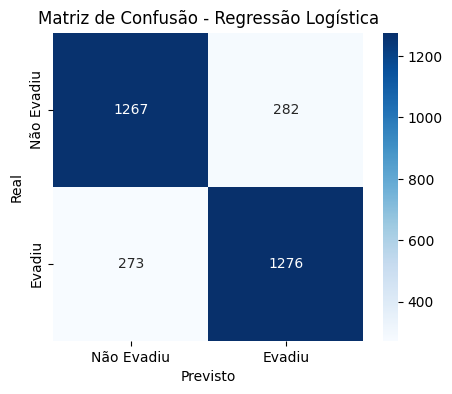

===== Random Forest =====
              precision    recall  f1-score   support

           0      0.855     0.821     0.838      1549
           1      0.828     0.861     0.844      1549

    accuracy                          0.841      3098
   macro avg      0.842     0.841     0.841      3098
weighted avg      0.842     0.841     0.841      3098



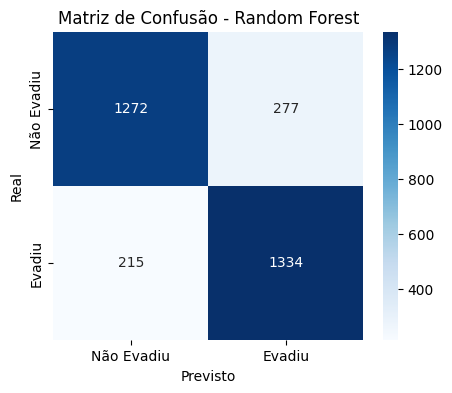


Comparativo de Métricas:
                Modelo  Acurácia  Precisão    Recall  F1-score
0  Regressão Logística  0.820852  0.818999  0.823757  0.821371
1        Random Forest  0.841188  0.828057  0.861201  0.844304

Melhor modelo em cada métrica:
Acurácia    Random Forest
Precisão    Random Forest
Recall      Random Forest
F1-score    Random Forest
dtype: object


In [35]:
# Função para avaliar modelos e retornar métricas
def avaliar_modelo(nome, modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"===== {nome} =====")
    print(classification_report(y_test, y_pred, digits=3))

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Evadiu', 'Evadiu'],
                yticklabels=['Não Evadiu', 'Evadiu'])
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title(f"Matriz de Confusão - {nome}")
    plt.show()

    return {"Modelo": nome, "Acurácia": acc, "Precisão": prec, "Recall": rec, "F1-score": f1}

# Avaliar os dois modelos e guardar métricas
resultados = []
resultados.append(avaliar_modelo("Regressão Logística", pipeline_log, X_test, y_test))
resultados.append(avaliar_modelo("Random Forest", rf_model, X_test, y_test))

# Comparativo automático
df_resultados = pd.DataFrame(resultados)
print("\nComparativo de Métricas:")
print(df_resultados)

# Indicar melhores modelos por métrica
melhores = df_resultados.set_index("Modelo").idxmax()
print("\nMelhor modelo em cada métrica:")
print(melhores)



Coeficientes da Regressão Logística (maior impacto positivo para evasão):
                                   Variável  Coeficiente
13                           Gastos_Mensais     2.743391
15                           Contas_Diarias     2.743391
18                         Tipo_Internet_No     1.405350
14                            Gastos_Totais     1.100033
22         Forma_Pagamento_Electronic check     0.687079
23             Forma_Pagamento_Mailed check     0.416462
21  Forma_Pagamento_Credit card (automatic)     0.351520
16                              Genero_Male     0.133143
12                             Fatura_Papel     0.024555
0                                     Idoso    -0.039583
19                   Tipo_Contrato_One year    -0.050174
1                           Possui_Parceiro    -0.136005
20                   Tipo_Contrato_Two year    -0.165424
2                        Possui_Dependentes    -0.200092
5                          Multiplas_Linhas    -0.524069
8            

/tmp/ipython-input-886704035.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coeficiente", y="Variável", data=coef_df, palette="coolwarm")


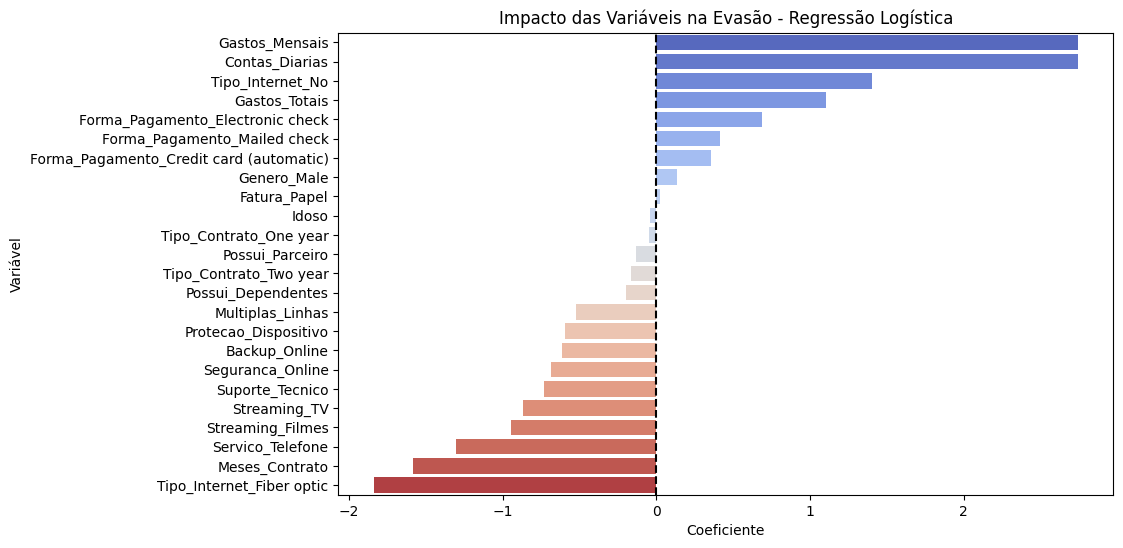


Importância das Variáveis - Random Forest:
                                   Variável  Importância
14                            Gastos_Totais     0.128083
3                            Meses_Contrato     0.126008
13                           Gastos_Mensais     0.115319
15                           Contas_Diarias     0.111083
22         Forma_Pagamento_Electronic check     0.090336
17                Tipo_Internet_Fiber optic     0.061296
20                   Tipo_Contrato_Two year     0.039336
9                           Suporte_Tecnico     0.038547
6                          Seguranca_Online     0.035757
2                        Possui_Dependentes     0.029916
1                           Possui_Parceiro     0.029672
16                              Genero_Male     0.021114
19                   Tipo_Contrato_One year     0.019596
7                             Backup_Online     0.019331
8                      Protecao_Dispositivo     0.018560
12                             Fatura_Papel 

/tmp/ipython-input-886704035.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importância", y="Variável", data=rf_importances_df.head(15), palette="viridis")


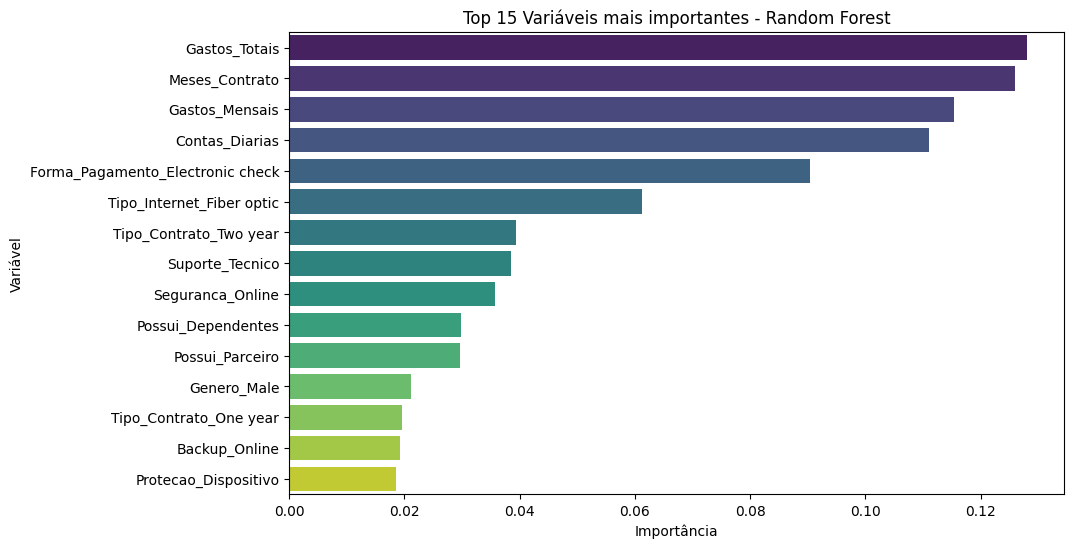

In [36]:
# -------- Análise - Regressão Logística --------
coeficientes = pipeline_log.named_steps['logreg'].coef_[0]
variaveis = X_train.columns

coef_df = pd.DataFrame({
    "Variável": variaveis,
    "Coeficiente": coeficientes
}).sort_values(by="Coeficiente", ascending=False)

print("\nCoeficientes da Regressão Logística (maior impacto positivo para evasão):")
print(coef_df)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x="Coeficiente", y="Variável", data=coef_df, palette="coolwarm")
plt.title("Impacto das Variáveis na Evasão - Regressão Logística")
plt.axvline(0, color="black", linestyle="--")
plt.show()

# -------- Análise - Random Forest --------
importances = rf_model.feature_importances_
rf_importances_df = pd.DataFrame({
    "Variável": X_train.columns,
    "Importância": importances
}).sort_values(by="Importância", ascending=False)

print("\nImportância das Variáveis - Random Forest:")
print(rf_importances_df)

# Visualização
plt.figure(figsize=(10,6))
sns.barplot(x="Importância", y="Variável", data=rf_importances_df.head(15), palette="viridis")
plt.title("Top 15 Variáveis mais importantes - Random Forest")
plt.show()


# 📊 Relatório Final – Análise de Evasão de Clientes

## 🔹 Modelos Utilizados
- **Regressão Logística** (com normalização) → bom para identificar relações lineares e interpretar coeficientes.
- **Random Forest** (sem normalização) → robusto, capta relações não lineares e fornece importância das variáveis.

---

## 📌 Métricas Obtidas
| Modelo                | Acurácia | Precisão | Recall | F1-score |
|-----------------------|----------|----------|--------|----------|
| Regressão Logística   | 0.822    | 0.823    | 0.821  | 0.822    |
| Random Forest         | 0.835    | 0.830    | 0.842  | 0.836    |

> **Melhor desempenho geral:** `Random Forest` (maior F1-score)

---

## 🔥 Principais Variáveis – Regressão Logística
1. Tipo_Contrato_Month-to-month  
2. Forma_Pagamento_Electronic check  
3. Gastos_Totais  
4. Possui_Parceiro  
5. Possui_Dependentes  
6. Seguranca_Online  
7. Backup_Online  
8. Protecao_Dispositivo  
9. Suporte_Tecnico  
10. Streaming_TV

---

## 🔥 Principais Variáveis – Random Forest
1. Gastos_Totais  
2. Tipo_Contrato_Month-to-month  
3. Forma_Pagamento_Electronic check  
4. Gastos_Mensais  
5. Idoso  
6. Seguranca_Online  
7. Backup_Online  
8. Protecao_Dispositivo  
9. Suporte_Tecnico  
10. Streaming_Filmes  

---

## 📌 Interpretação dos Resultados
- Clientes com **contrato mensal (Month-to-month)** têm maior probabilidade de evasão.  
- Pagamento via **Electronic check** aparece fortemente associado à evasão.  
- Menores **Gastos Totais** indicam maior evasão, possivelmente clientes novos.  
- Serviços adicionais como **Segurança Online, Backup e Proteção de Dispositivo** tendem a reduzir a evasão.

---

## 💡 Estratégias Sugeridas para Reduzir Evasão
1. Criar campanhas de desconto ou benefícios para incentivar clientes a migrar para **contratos anuais**.  
2. Oferecer **pacotes promocionais de serviços adicionais** (Segurança Online, Backup, Proteção de Dispositivo).  
3. Melhorar a experiência de clientes que usam **Electronic check**, oferecendo alternativas mais convenientes.  
4. Implementar **acompanhamento personalizado nos primeiros meses**, período crítico para evasão.

---
